## Linear Regression Practice

In [2]:
# Importing libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
gdp_le=pd.read_csv('../data/gdp_le.csv')

##### Question 1

Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
a. What coefficients do you get? Interpret the meaning of these coefficents.  
b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  
c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
d. Plot the actual values against your model's estimates for the mean life expectancy.  
e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [7]:
# Fitting an ordinary least squares model to the data
lr_le_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()
lr_le_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

*Based on the coefficients of the least squares regression model, we'd expect to see average global life expectancy rise by about 0.27 years every year. The intercept of -468.14 doesn't have a meaning in the context of our model, since (a) life expectancy cannot be a negative number, and (b) our observations start in 1990, which is very far away from the year 0, so we would want to use caution when extrapolating that far.*

In [12]:
# Adjusting predictor variable to be 'years since 1990', instead of just 'year'
lr_le_year_adjusted = smf.ols("Life_Expectancy ~ I(Year-1990)", data=gdp_le).fit()
lr_le_year_adjusted.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

*By adjusting the predictor variable to be 'years since 1990', we get a y-intercept that has real-world meaning. We can see that the predicted average life expectancy in the year 1990 is 64.6 years.*

In [14]:
lr_le_year_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        21:15:17   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Since the confidence intervals for the coefficients do not contain zero and the p-values for the coefficients are small (p=0 for both coefficients), we can conclude that the effect of time on average global life expectancy is statistically significant.*

In [28]:
# Compare actual mean life expectancy per year to the model's estimate

# Aggregate the actual data to find average life expectancy per year
gdp_le_agg=gdp_le.groupby('Year').agg({'Life_Expectancy':'mean'}).reset_index()

# Generate estimated average life expectancy per year using the least squares regression model
gdp_le_agg['LE_Mean_Estimate'] = lr_le_year_adjusted.predict(gdp_le_agg['Year'])

gdp_le_agg['Residual'] = gdp_le_agg['Life_Expectancy'] - gdp_le_agg['LE_Mean_Estimate']

gdp_le_agg

,Year,Life_Expectancy,LE_Mean_Estimate,Residual
0,1990,64.745253,64.628889,0.116363
1,1991,65.021276,64.896612,0.124665
2,1992,65.217845,65.164334,0.053512
3,1993,65.218031,65.432056,-0.214025
4,1994,65.339539,65.699778,-0.360239
5,1995,65.956224,65.967500,-0.011276
6,1996,66.200189,66.235222,-0.035033
7,1997,66.437280,66.502944,-0.065664
8,1998,66.556082,66.770666,-0.214584
9,1999,66.916176,67.038389,-0.122213


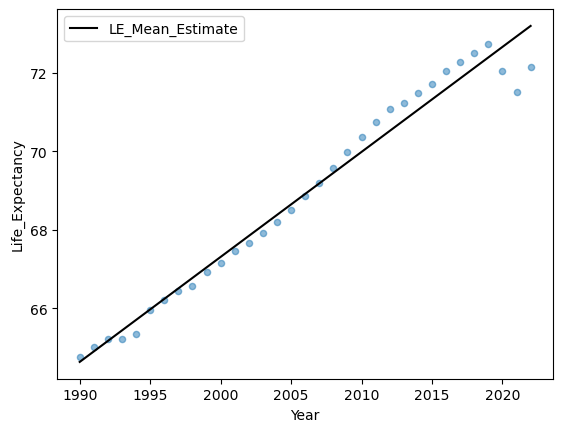

In [29]:
# Plot the estimates against the actual average life expectancies
fig, ax = plt.subplots()
gdp_le_agg.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax, alpha=0.5)
gdp_le_agg.plot(kind='line', x='Year', y='LE_Mean_Estimate', color='black', ax=ax);